# CaFe analysis

In [1]:
# Python imports
from matplotlib.offsetbox import AnchoredText
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
# Imports from scripts
from scripts.figures import set_rc_parameters
from scripts.integration import momentum_mesh

from test_momentum_distribution_script import load_momentum_distribution
from test_momentum_distribution_script import compute_normalization
from single_particle_states import WoodsSaxon

In [3]:
# Run this cell to turn on customized matplotlib graphics
set_rc_parameters()

Z = 19.983609979975444
N = 19.96765357267658
Z = 20.00036173651649
N = 27.97489574412655
Z = 26.036071288757622
N = 28.021210471581576


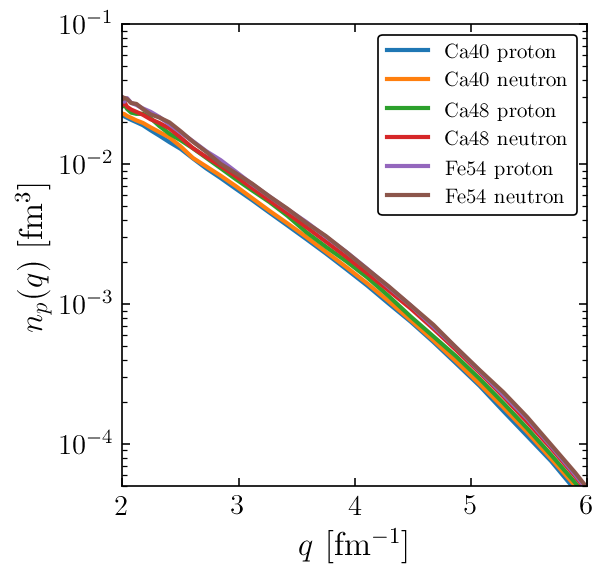

In [4]:
# Load Ca40 Ca48

# Flag for saving .txt files
# save = False
save = True
print_normalization = True

q_array, q_weights = momentum_mesh(10.0, 2.0, 120)

nuclei = ['Ca40', 'Ca48', 'Fe54']
kvnn, lamb = 6, 1.5

f, ax = plt.subplots(figsize=(4, 4))

for nucleus in nuclei:
    
    if nucleus == 'Fe54':
        factor = 4*np.pi
    else:
        factor = 1

    p_data = load_momentum_distribution(nucleus, 'proton', kvnn, lamb)
    q_p_array = p_data[0]
    q_p_weights = p_data[1]
    n_p_array = p_data[2] / factor
    n_func = InterpolatedUnivariateSpline(q_p_array, n_p_array)
    n_p_array = n_func(q_array)
    
    n_data = load_momentum_distribution(nucleus, 'neutron', kvnn, lamb)
    q_n_array = n_data[0]
    q_n_weights = n_data[1]
    n_n_array = n_data[2] / factor
    n_func = InterpolatedUnivariateSpline(q_n_array, n_n_array)
    n_n_array = n_func(q_array)
    
    if print_normalization:
        norm_p = compute_normalization(q_array, q_weights, n_p_array)
        print(f"Z = {norm_p}")
        norm_n = compute_normalization(q_array, q_weights, n_n_array)
        print(f"N = {norm_n}")
    
    if save:
        p_data_new = np.vstack((q_array, q_weights, n_p_array)).T
        p_file_name = f"{nucleus}_proton_momentum_distribution"
        hdr = "q [fm^-1],   q weight [fm^-1],   n(q) [fm^3]\n"
        np.savetxt(p_file_name + '.txt', p_data_new, header=hdr)
        n_data_new = np.vstack((q_array, q_weights, n_n_array)).T
        n_file_name = f"{nucleus}_neutron_momentum_distribution"
        hdr = "q [fm^-1],   q weight [fm^-1],   n(q) [fm^3]\n"
        np.savetxt(n_file_name + '.txt', n_data_new, header=hdr)

    ax.semilogy(q_array, n_p_array, label=f"{nucleus} proton", linewidth=2.0)
    ax.semilogy(q_array, n_n_array, label=f"{nucleus} neutron", linewidth=2.0)
    
ax.legend(fontsize=10)
# ax.set_xlim(0.0, 6.0)
ax.set_xlim(2.0, 6.0)
# ax.set_ylim(1e-4, 1e-1)
ax.set_ylim(5e-5, 1e-1)
ax.set_xlabel(r"$q$ [fm" + r'$^{-1}$' + ']', fontsize=16)
ax.set_ylabel(r"$n_p(q)$ [fm$^3$]", fontsize=16)

plt.show()

In [ ]:
def set_isospins():
    """Possible values of \tau_1, ..., \tau_4 given M_T = 0."""
    
    M_T = 0
    spins = [1/2, -1/2]
    isospins = []
    for tau_1 in spins:
        for tau_2 in spins:
            if tau_1 + tau_2 == M_T:
                for tau_3 in spins:
                    for tau_4 in spins:
                        if tau_3 + tau_4 == M_T:
                            isospins.append((tau_1, tau_2, tau_3, tau_4))
    
    return isospins

In [ ]:
def lowk_integrand(nucleus_name, Z, N):
    """\sum_\sigma \sum_\tau \sum_{\alpha \beta} \int d3k d3kp d3K
        x \psi_\alpha(k1;s1,t1) \psi_\beta(k2;s2,t2) [\psi_\alpha(k3;s3,t3)
            x \psi_\beta(k4;s4,t4) - \alpha <-> \beta]
    """
    
    
    ws = WoodsSaxon(nucleus_name, Z, N)
    
    isospins = set_isospins()
    
    return None

In [5]:
def ratios(include_neutron=False, no_z_factor=False, factorization_lines=False):
    """Ratios of Fe54/Ca40 and Ca48/Ca40."""

    # Ca40
    ca40_p_data = np.loadtxt("Ca40_proton_momentum_distribution.txt")
    q_array = ca40_p_data[:, 0]
    q_weights = ca40_p_data[:, 1]
    np_ca40 = ca40_p_data[:, 2]

    # Ca48
    ca48_p_data = np.loadtxt("Ca48_proton_momentum_distribution.txt")
    np_ca48 = ca48_p_data[:, 2]

    # Fe54
    fe54_p_data = np.loadtxt("Fe54_proton_momentum_distribution.txt")
    np_fe54 = fe54_p_data[:, 2]

    if include_neutron:
        
        nn_ca40 = np.loadtxt("Ca40_neutron_momentum_distribution.txt")[:, 2]
        nn_ca48 = np.loadtxt("Ca48_neutron_momentum_distribution.txt")[:, 2]
        nn_fe54 = np.loadtxt("Fe54_neutron_momentum_distribution.txt")[:, 2]
    
        fe_ratio = (np_fe54 + nn_fe54) / (np_ca40 + nn_ca40) * (40/54)
        ca_ratio = (np_ca48 + nn_ca48) / (np_ca40 + nn_ca40) * (40/48)
    
    else:

        if no_z_factor:
            fe_ratio = np_fe54 / np_ca40
            y_limits = (0.9, 1.4)
        else:
            fe_ratio = (20 * np_fe54) / (26 * np_ca40)
            y_limits = (0.9, 1.4)
    
        ca_ratio = np_ca48 / np_ca40

    f, ax = plt.subplots(figsize=(4, 4))

    ax.plot(q_array, fe_ratio, label=r"$\frac{^{54}\rm{Fe}}{^{40}\rm{Ca}}$",
            lw=2.0)
    ax.plot(q_array, ca_ratio, label=r"$\frac{^{48}\rm{Ca}}{^{40}\rm{Ca}}$",
            lw=2.0)
    ax.axhline(y=1, alpha=0.3, color='gray')
    
    ax.legend(fontsize=12)
    ax.set_xlim(2.0, 6.0)
    ax.set_ylim(y_limits)
    ax.set_xlabel(r"$q$ [fm" + r'$^{-1}$' + ']', fontsize=16)
    ax.set_ylabel(r"$n_p(q)$ ratio", fontsize=16)

    plt.show()

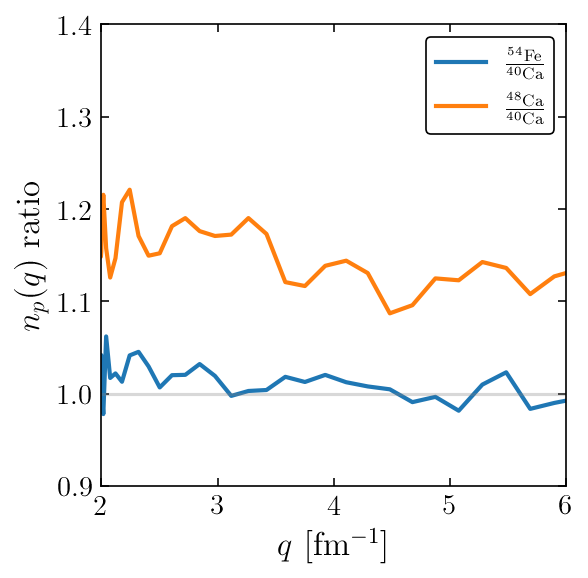

In [6]:
ratios()

In [7]:
# How to do Figure 2? # of S pairs vs A

SyntaxError: invalid syntax (1102136943.py, line 1)